<a href="https://colab.research.google.com/github/DHANANJAYxCHAUDHARY/BridgeLabz-2415500155-Training/blob/main/ML_MANTHAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import liabraries**

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# **Read the data**

In [161]:
df=pd.read_csv("/content/ADNIMERGE_data.csv")

In [162]:
df

,RID,VISCODE,MONTHS,EXAMDATE,AGE,PTGENDER,PTEDUCAT,APOE4,DX,MMSE,ADAS13,AV45,FDG,HIPPO_VOL_ML,ABETA42_PG_ML,ABETA40_PG_ML,ABETA42_ABETA40_RATIO,PTAU181_PG_ML,TTAU_PG_ML
0,2207,v6,6,2010-06-24,76,F,16,0,MCI,27.9,11.3,1.065,1.140,5.441,847.9,10844.7,0.0782,35.54,357.9
1,2234,v24,24,2011-12-28,85,F,15,0,AD,23.3,35.8,1.331,0.984,5.629,555.7,11355.5,0.0489,34.16,380.0
2,2111,bl,0,2010-01-06,75,F,11,0,CN,29.6,12.2,1.100,1.059,5.605,1355.5,12611.2,0.1075,17.15,217.5
3,2124,v12,12,2011-01-03,74,F,18,1,AD,22.0,50.9,1.388,0.849,5.332,351.2,12089.2,0.0291,81.16,635.9
4,2198,v6,6,2010-07-06,59,M,20,0,CN,30.0,8.4,1.007,1.090,5.771,1021.6,12528.1,0.0815,21.00,130.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2030,v12,12,2010-12-23,70,M,14,0,CN,29.1,8.9,1.215,1.169,6.218,1171.5,11668.4,0.1004,17.48,191.4
1127,2277,v24,24,2012-01-09,74,F,13,0,MCI,26.9,13.7,1.162,1.092,5.793,1002.6,12236.5,0.0819,28.08,358.8
1128,2292,v6,6,2010-06-26,73,F,15,1,MCI,26.2,6.8,1.069,1.070,5.954,NaN,10316.3,0.1048,36.79,267.2
1129,2226,bl,0,2010-01-03,70,M,12,1,CN,28.7,7.7,1.297,1.141,6.089,1213.2,13476.5,0.0900,27.44,288.3


# **Check null values**

In [163]:
df.isnull().sum()


,0
RID,0
VISCODE,0
MONTHS,0
EXAMDATE,0
AGE,0
PTGENDER,0
PTEDUCAT,0
APOE4,0
DX,0
MMSE,0


# Remove null values from data

In [164]:

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].mean())

display(df.head())
display(df.isnull().sum())


,RID,VISCODE,MONTHS,EXAMDATE,AGE,PTGENDER,PTEDUCAT,APOE4,DX,MMSE,ADAS13,AV45,FDG,HIPPO_VOL_ML,ABETA42_PG_ML,ABETA40_PG_ML,ABETA42_ABETA40_RATIO,PTAU181_PG_ML,TTAU_PG_ML
0,2207,v6,6,2010-06-24,76,F,16,0,MCI,27.9,11.3,1.065,1.140,5.441,847.9,10844.7,0.0782,35.54,357.9
1,2234,v24,24,2011-12-28,85,F,15,0,AD,23.3,35.8,1.331,0.984,5.629,555.7,11355.5,0.0489,34.16,380.0
2,2111,bl,0,2010-01-06,75,F,11,0,CN,29.6,12.2,1.100,1.059,5.605,1355.5,12611.2,0.1075,17.15,217.5
3,2124,v12,12,2011-01-03,74,F,18,1,AD,22.0,50.9,1.388,0.849,5.332,351.2,12089.2,0.0291,81.16,635.9
4,2198,v6,6,2010-07-06,59,M,20,0,CN,30.0,8.4,1.007,1.090,5.771,1021.6,12528.1,0.0815,21.00,130.4


,0
RID,0
VISCODE,0
MONTHS,0
EXAMDATE,0
AGE,0
PTGENDER,0
PTEDUCAT,0
APOE4,0
DX,0
MMSE,0


# To create a new target variable

In [165]:
df['AD_CONVERSION_36M'] = 0
df.loc[(df['DX'] == 'AD') & (df['MONTHS'] <= 36), 'AD_CONVERSION_36M'] = 1

print("Value counts for AD_CONVERSION_36M:")
print(df['AD_CONVERSION_36M'].value_counts())

print(df[['DX', 'MONTHS', 'AD_CONVERSION_36M']].head())

Value counts for AD_CONVERSION_36M:
AD_CONVERSION_36M
0    1016
1     115
Name: count, dtype: int64
    DX  MONTHS  AD_CONVERSION_36M
0  MCI       6                  0
1   AD      24                  1
2   CN       0                  0
3   AD      12                  1
4   CN       6                  0


# Train and Test model

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RandomForestClassifier algorithm

In [167]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


# Calculate evaluation metrics

In [168]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9912
Precision: 0.9259
Recall: 1.0000
F1-Score: 0.9615


# Calculate AUC score

In [169]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.9954


# Plot ROC curve

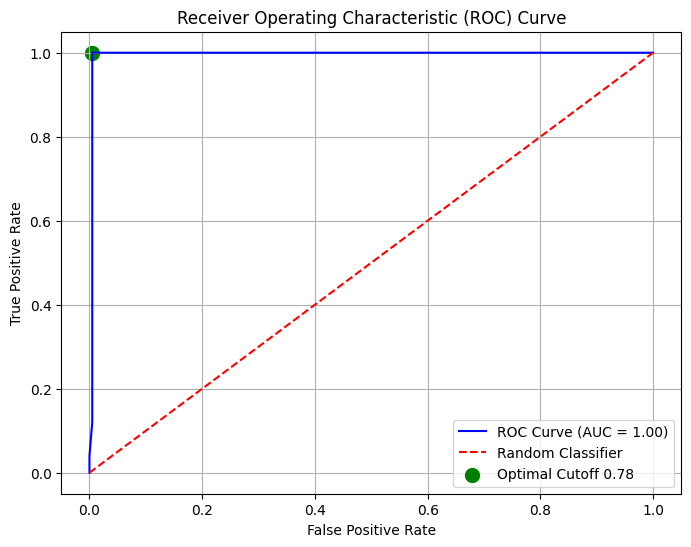

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='green', marker='o', s=100, label=f'Optimal Cutoff {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
df = pd.get_dummies(df, columns=['PTGENDER'], drop_first=True)

feature_cols = ['AGE', 'PTEDUCAT', 'APOE4', 'MMSE', 'ADAS13', 'AV45', 'FDG', 'HIPPO_VOL_ML', 'ABETA42_PG_ML', 'ABETA40_PG_ML', 'ABETA42_ABETA40_RATIO', 'PTAU181_PG_ML', 'TTAU_PG_ML', 'PTGENDER_M']

X = df[feature_cols]
y = df['AD_CONVERSION_36M']

# Apply standard scalar

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Apply Logistic regression model

In [173]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')


log_reg_model.fit(X_train_pca, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_pca)

# Evaluation metrics

In [174]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"\nLogistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1-Score: {f1_log_reg:.4f}")



Logistic Regression Accuracy: 0.9956
Logistic Regression Precision: 0.9615
Logistic Regression Recall: 1.0000
Logistic Regression F1-Score: 0.9804


# Calculate AUC Score

In [175]:
auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

Logistic Regression AUC: 0.9960


# ROC curve

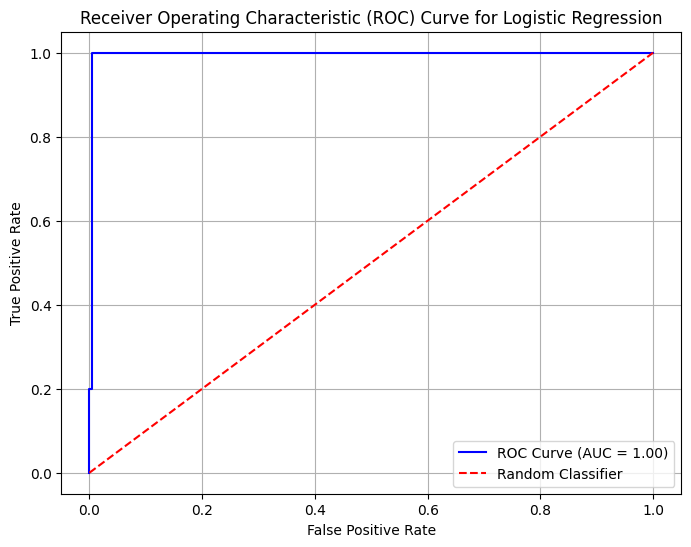

In [176]:
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_pca)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'ROC Curve (AUC = {auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [187]:
example_features = {
    'AGE': 75,
    'PTEDUCAT': 16,
    'APOE4': 1,
    'MMSE': 25,
    'ADAS13': 15.0,
    'AV45': 1.2,
    'FDG': 1.05,
    'HIPPO_VOL_ML': 5.5,
    'ABETA42_PG_ML': 800.0,
    'ABETA40_PG_ML': 10000.0,
    'ABETA42_ABETA40_RATIO': 0.08,
    'PTAU181_PG_ML': 30.0,
    'TTAU_PG_ML': 300.0,
    'PTGENDER': 'M'  # 'M' or 'F'
}

predicted_probability = predict_ad_conversion_likelihood(example_features)

print(f"Predicted AD Conversion: {prediction_result}")

Predicted AD Conversion: No
